<a href="https://colab.research.google.com/github/nalinis07/APT_Ref_Copy_Links/blob/MASTER/AT_Lesson_99_Reference_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 99: Detect Credit Card Defaulters - Decision Tree I

**WARNING:** The reference notebook is meant **ONLY** for a teacher. Please **DO NOT** share it with any student.

The contents of the reference notebook are meant only to prepare a teacher for a class. To conduct the class, use the class copy of the reference notebook. The link and the instructions for the same are provided in the **Notes To The Teacher** section.


|Particulars|Description|
|-|-|
|**Topic**|Detect Credit Card Defaulters - Decision Tree I|
|||
|**Class Description**|A student will learn to build a decision tree model to detect credit card defaulters|
|||
|**Class**|C99|
|||
|**Class Time**|55 minutes|
|||
|**Goal**|Build a decision tree model to predict credit card defaulters|
||Create an actual decision tree for the model built|
|||
|**Teacher Resources**|Google Account|
||Laptop with internet connectivity|
||Earphones with mic|
|||
|**Student Resources**|Google Account|
||Laptop with internet connectivity|
||Earphones with mic|

---

### Warm-up Quiz

```
TEACHER
I have an exciting quiz question for you! Are you ready to answer this question?

EXPECTED STUDENT RESPONSE
Yes.
```

**Instructions for the Teacher:**
- Please click on the "Quiz Time" button on the bottom right corner of your screen to start the In-Class Quiz. <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/quiz-time.png' width = 150>

- A quiz will be visible to both you and the student. Encourage the student to answer the quiz question.

- The student may choose the wrong option, help the student to think correctly about the question and then answer again.

- After the student selects the correct option, the "End Quiz" button will start appearing on your screen. <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/end-quiz.png' width = 150>  

- Click the "End quiz" button to close the quiz pop-up and continue the class.
  
- Do not spend more than 2 minutes on this quiz.

---

### Teacher-Student Activities

In the previous lesson you learned to create subplots and pivot tables to summarise data with more granularity. In this lesson, you learn to build a decision tree classification model using the `sklearn` Python module.

Let's quickly go through the activities covered in the previous lesson and begin this lesson from **Activity 1: Correlation Analysis** section.

---

#### Detect Credit Cart Defaulters - Problem Statement

The Taiwanese bank has issued credit cards to many of its clients. They have maintained a dataset of credit card `DEFAULTERS` for a period from April 2005 to September 2005.

You need to build a **Decision Tree** model to predict whether or not the client will pay the credit card bill for the next month.

Predicting accurately which customers are most probable to default represents a significant business opportunity for all banks. This can improve the customer screening process and also helps in assessing the credibility of the customer. It also helps bank in reducing the spending limit of the credit card holder or initiate with the legal steps for amount recovery.

**Dataset Description**

The dataset contains 30,000 rows and 25 columns. Each column represents an attribute of the customer as described in the table below.

|Sr No.|Attribute|Attribute Information|
|-|-|-|
|1|ID|ID of each customer, which has been masked to display serial number to hide confidential customer information (Integer)|
|2|LIMIT_BAL|Amount of given credit in NT dollars (including supplementary credit cards) (Float)|
|3|SEX|Gender (1=male, 2=female) (Integer)|
|4|EDUCATION| (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown) (Integer)|
|5|MARRIAGE|Marital status (1=married, 2=single, 3=others) (Integer)|
|6|AGE|Customer age in years (Integer)|
|7|PAY_0|Repayment status in September, 2005 (-1=paid on time, 1=payment delay for one month, 2=payment delay for two months, … , 8=payment delay for eight months and above) (Integer)|
|8|PAY_2|Repayment status in August, 2005 (scale same as above) (Integer)|
|9|PAY_3|Repayment status in July, 2005 (scale same as above) (Integer)|
|10|PAY_4|Repayment status in June, 2005 (scale same as above) (Integer)|
|11|PAY_5|Repayment status in May, 2005 (scale same as above) (Integer)|
|12|PAY_6|Repayment status in April, 2005 (scale same as above) (Integer)|
|13|BILL_AMT1|Amount of bill statement in September, 2005 (NT dollar) (Float)|
|14|BILL_AMT2|Amount of bill statement in August, 2005 (NT dollar) (Float)|
|15|BILL_AMT3|Amount of bill statement in July, 2005 (NT dollar) (Float)|
|16|BILL_AMT4|Amount of bill statement in June, 2005 (NT dollar) (Float)|
|17|BILL_AMT5|Amount of bill statement in May, 2005 (NT dollar) (Float)|
|18|BILL_AMT6|Amount of bill statement in April, 2005 (NT dollar) (Float)|
|19|PAY_AMT1|Amount of previous payment in September, 2005 (NT dollar) (Float)|
|20|PAY_AMT2|Amount of previous payment in August, 2005 (NT dollar) (Float)|
|21|PAY_AMT3|Amount of previous payment in July, 2005 (NT dollar) (Float)|
|22|PAY_AMT4|Amount of previous payment in June, 2005 (NT dollar) (Float)|
|23|PAY_AMT5|Amount of previous payment in May, 2005 (NT dollar) (Float)|
|24|PAY_AMT6|Amount of previous payment in April, 2005 (NT dollar) (Float)|
|25|default.payment.next.month|Default payment (1=yes, 0=no) (Integer)|

<br>

This data set consists of following key features:
- The payment status for 6 previous bill cycles
- The outstanding bill amount and the repayment status along with the amount paid
- The demographic information of the customers

The target column of this dataset is `default.payment.next.month` which classifies the customer into two categories:
- `1` (yes) - means the customer is not going to pay for the next month bill and hence will be termed as **defaulter**.
- `0` (no) - means the customer will pay the bill for the next month and will be termed as **non-defaulter**.


Some ideas for exploration:
1. How does the probability of default payment vary by categories of different demographic variables?
2. Which variables are the strongest predictors of default payment?


**Dataset source:** https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

**Citation:**  Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.

---

#### Importing Modules & Reading Data

Let's import the necessary Python modules, read the data from a csv file to create a Pandas DataFrame and go through the necessary data-cleaning process (if required).

Here is the link to the dataset:
https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/uci-credit-card-fraud/UCI_Credit_Card.csv

In [ ]:
# Import the modules, read the dataset and create a Pandas DataFrame.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cc_client_csv = 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/uci-credit-card-fraud/UCI_Credit_Card.csv'
df = pd.read_csv(cc_client_csv)

# Print the first five records
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


Now, let's find out the total number of rows and columns, data-types of columns and missing values (if exist) in the dataset.

In [ ]:
# Get the total number of rows and columns, data-types of columns and missing values (if exist) in the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

There are 30,000 rows and 25 columns and 0 missing (or null) values in the dataset. Also, all the columns have numeric values so we won't have to encode any non-numeric value into a numeric values.

Here, we can see that the column names don't have whitespaces. We can also observe that the column names in the repayment condition are not consistent, hence we will rename `PAY_0` to `PAY_1`. The column name for the target variable i.e. `default.payment.next.month` can be changed to a shorter one say `DEFAULT` for convenience.

In [ ]:
# Rename 'PAY_0' to 'PAY_1', and 'default.payment.next.month' to 'DEFAULT'.
df.rename(columns = {"PAY_0": "PAY_1"}, inplace = True)
df.rename(columns = {"default.payment.next.month": "DEFAULT"}, inplace = True)

# Check whether the names of the two columns are changed or not.
for i in range(df.shape[1]):
  print(f"At index {i:02}, {df.columns[i]}")

At index 00, ID
At index 01, LIMIT_BAL
At index 02, SEX
At index 03, EDUCATION
At index 04, MARRIAGE
At index 05, AGE
At index 06, PAY_1
At index 07, PAY_2
At index 08, PAY_3
At index 09, PAY_4
At index 10, PAY_5
At index 11, PAY_6
At index 12, BILL_AMT1
At index 13, BILL_AMT2
At index 14, BILL_AMT3
At index 15, BILL_AMT4
At index 16, BILL_AMT5
At index 17, BILL_AMT6
At index 18, PAY_AMT1
At index 19, PAY_AMT2
At index 20, PAY_AMT3
At index 21, PAY_AMT4
At index 22, PAY_AMT5
At index 23, PAY_AMT6
At index 24, DEFAULT


We can see that

- `'PAY_0'` has changed to `'PAY_1'`

- `'default.payment.next.month'` has changed to `'DEFAULT'`

- The `'ID'` column is dropped from the DataFrame

---

#### Data Analysis

Now, let's analyse the data to find out any kind of pattern in the behaviour of defaulters.

Let's get the counts of defaulters and non-defaulters to see whether former are in large numbers or the latter.

In [ ]:
# Get the counts of defaulters and non-defaulters to see whether former are in large numbers or the latter.
print("Count of defaulters and non-defaulters.")
print(df['DEFAULT'].value_counts(), "\n" + "-" * 100)

# Get the percentage of defaulters and non-defaulters.
print("Percentage of defaulters and non-defaulters.")
print(df['DEFAULT'].value_counts(normalize = True), "\n" + "-" * 100) # The 'normalize = True' returns the counts as fractions of the total.

# Calculate the number of male and female clients out of all the defaulters.
grp_gender_df = df[['ID', 'SEX', 'DEFAULT']].groupby(by = ['DEFAULT', 'SEX']).count()
print("The number of male and female clients out of all the defaulters.")
print(grp_gender_df, "\n" + "-" * 100)

# Out of all the defaulters, calculate the number of credit card clients having different education qualification.
grp_edu_df = df[['ID', 'EDUCATION', 'DEFAULT']].groupby(by = ['DEFAULT', 'EDUCATION']).count()
print("The number of credit card clients having different education qualification out of the total defaulters.")
print(grp_edu_df, "\n" + "-" * 100)

Count of defaulters and non-defaulters.
0    23364
1     6636
Name: DEFAULT, dtype: int64 
----------------------------------------------------------------------------------------------------
Percentage of defaulters and non-defaulters.
0    0.7788
1    0.2212
Name: DEFAULT, dtype: float64 
----------------------------------------------------------------------------------------------------
The number of male and female clients out of all the defaulters.
                ID
DEFAULT SEX       
0       1     9015
        2    14349
1       1     2873
        2     3763 
----------------------------------------------------------------------------------------------------
The number of credit card clients having different education qualification out of the total defaulters.
                      ID
DEFAULT EDUCATION       
0       0             14
        1           8549
        2          10700
        3           3680
        4            116
        5            262
        6             

Observations:

- Out of 30,000 credit card clients, 23,364 pay on time (non-defaulters) and the remaining 6,636 clients don't pay on time (defaulters). Let's get the percentage of defaulters and non-defaulters.

- Only about **22%** of the credit card clients of Taiwanese bank **fail to pay their credit card bills on time.**

- Out of 6636 defaulters, 2873 were `1`-male and 3763 were `2`-female.

- Out of 6636 defaulters, majorly

  - 3330 were university graduates.

  - 2036 were graduation school graduates.

  - 1237 were high school graduates.

  The reason for higher number of defaulters being university school graduates could be that the most of the credit clients are university graduates. Let's validate this suspicion by calculating the counts of different categorical values in the `'EDUCATION'` column.


In [ ]:
# Calculate the counts of different categorical values in the 'EDUCATION' column.
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

As you can see, our suspicion is correct because the most of the credit clients are university graduates followed by graduation school graduates followed by high school graduates.

Here, we observe that in the education column we have some redundant information. From the dataset description we have:

 * `1` - graduate school
 * `2` - university
 * `3` - high school
 * `4` - others
 * `5` - unknown
 * `6` - unknown

This clearly indicates that we can merge the labels `5` and `6` to reduce the number of categories for education and replace the number of unwanted values in the column. The label `4` denotes that a client have some other form of education which could be either vocational training, certificate, diploma etc.

It will help us in reducing the complexity of the resulting decision tree and reduce the computational time as well.

**Hint:**
The syntax used is: `pandas.DataFrame.loc [boolean_condition, column_name] = new_value`.

In [ ]:
# Remove redundancy in the 'EDUCATION' column.
df.loc[df['EDUCATION'] == 0, 'EDUCATION'] = 5
df.loc[df['EDUCATION'] == 6, 'EDUCATION'] = 5

# Calculate the count of all the labels again in the 'EDUCATION' column.
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      345
4      123
Name: EDUCATION, dtype: int64

Similarly, out of all the defaulters, let's calculate the number of credit card clients based on their marriage status.

In [ ]:
# Calculate the number of clients based on the marriage status out of all the defaulters.
grp_gender_df = df[['ID', 'MARRIAGE', 'DEFAULT']].groupby(by = ['DEFAULT', 'MARRIAGE']).count()
grp_gender_df

ID
DEFAULT MARRIAGE       
0       0            49
        1         10453
        2         12623
        3           239
1       0             5
        1          3206
        2          3341
        3            84

Here, we observe that in the education column we have some redundant information. From the dataset description we have:

 * `1` - married
 * `2` - single
 * `3` - others

This dataset has an extra parameter `0` in the marriage column. That may arise due to some error or when customer is not willing to provide the information. We can merge the label `0` with `3` to reduce the number of categories for marriage and replace the number of unwanted values in the column.

In [ ]:
# Remove redundancy in the 'EDUCATION' column.
df.loc[df['MARRIAGE'] == 0, 'MARRIAGE'] = 3

# Calculate the count of all the labels again in the 'EDUCATION' column.
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

Now find out the number of single and married credit card defaulters out of all the defaulters.

In [ ]:
# Out of all the defaulters, calculate the number of credit card clients having different education qualification.
grp_marriage_df = df[['ID', 'MARRIAGE', 'DEFAULT']].groupby(by = ['DEFAULT', 'MARRIAGE']).count()
print("The number of credit card clients having different education qualification out of all the defaulters.")
print(grp_marriage_df, "\n" + "-" * 100)

# Calulate the mean and median age of defaulters and non-defaulters.
grp_age_df = df[['AGE', 'DEFAULT']].groupby(by = 'DEFAULT').agg(func = ['mean', 'std', 'median'])
print("The mean and median age of defaulters and non-defaulters.")
print(grp_age_df, "\n" + "-" * 100)

# Calulate the mean and median 'LIMIT_BAL' of defaulters and non-defaulters.
grp_limit_bal_df = df[['LIMIT_BAL', 'DEFAULT']].groupby(by = 'DEFAULT').agg(func = ['mean', 'std', 'median'])
print("The mean and median 'LIMIT_BAL' of defaulters and non-defaulters.")
print(grp_limit_bal_df, "\n" + "-" * 100)

The number of credit card clients having different education qualification out of all the defaulters.
                     ID
DEFAULT MARRIAGE       
0       1         10453
        2         12623
        3           288
1       1          3206
        2          3341
        3            89 
----------------------------------------------------------------------------------------------------
The mean and median age of defaulters and non-defaulters.
               AGE                 
              mean       std median
DEFAULT                            
0        35.417266  9.077355   34.0
1        35.725738  9.693438   34.0 
----------------------------------------------------------------------------------------------------
The mean and median 'LIMIT_BAL' of defaulters and non-defaulters.
             LIMIT_BAL                         
                  mean            std    median
DEFAULT                                        
0        178099.726074  131628.359660  150000.0
1     

Observations:

- Among defaulters, both single and married credit card clients are equal nearly the same in number.

- Both the defaulters and non-defaulters have the same median and approximately the same mean age.

- The mean and median credit card limit of defaulters were lower compared to the limit of non-defaulters. This suggests that the repayment capacity of defaulters was lesser and hence they were given the lower credit limit.

In [ ]:
# Print the statistical description of the columns having continous numeric values in the data-frame.
df[['LIMIT_BAL', 'AGE'] + list(df.columns[12:-1])].describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


We can split the above measures of central tendency values by different categorical columns. For this we need to make pivot tables.

---

#### Pivot Table

A pivot table allows you to summarise statistical parameters in a two dimensional table. It is more powerful version of the grouping feature in Pandas.

To create a pivot table, you need to use the `pivot_table()` function of the Pandas module which returns a two dimensional table (also a Pandas DataFrame object). The levels in the pivot table will be stored in `MultiIndex` objects (hierarchical indexes) on the index and columns of the result DataFrame. Its **syntax** is:

> `pandas.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', sort=True)`

where

- `data` is a Pandas DataFrame object containing raw data.

- `values` is an optional parameter that decides which column values to aggregate.

- `index` decides about which column the values need to be split. In other words, about which column values you want to group the other column values.

- `columns` allows you to group the values further by a particular column.

- `aggfunc` is an aggregation function with mean being the default aggregator.

- `sort` specifies if the result should be sorted. Its default value is `True`

Let's create a pivot table that displays the median value of the columns containing continous numeric values and group them by `DEFAULT` and `AGE` columns.

In [ ]:
# Display the median value of the columns containing continous numeric values and group them by 'DEFAULT' and 'AGE' columns.
pivot_table1 = pd.pivot_table(data = df, values = ['LIMIT_BAL', 'AGE'] + list(df.columns[12:-1]), index = ['DEFAULT', 'SEX'], aggfunc = 'median')
pivot_table1

AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
DEFAULT SEX                                                               
0       1     35    25742.0    23827.0    21103.0    19483.0    18440.0   
        2     33    21368.0    20344.0    19570.0    18475.0    17318.0   
1       1     36    20139.0    20114.0    19753.0    19032.0    18161.0   
        2     33    20226.0    20503.0    20023.0    19315.0    18843.0   

             BILL_AMT6  LIMIT_BAL  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  \
DEFAULT SEX                                                                 
0       1      17531.0   150000.0    2458.0    2200.0    1991.0    1600.0   
        2      15872.0   160000.0    2460.0    2300.0    2000.0    1838.0   
1       1      17959.0    80000.0    1600.0    1500.0    1158.0    1000.0   
        2      18244.0   100000.0    1670.0    1600.0    1300.0    1000.0   

             PAY_AMT5  PAY_AMT6  
DEFAULT SEX                      
0       1      1600.0    1501.0  
        2      1868.0    1853.0  
1       1      1000.0     960.0  
        2      1000.0    1001.0

From the pivot table we can understand the distribution of the defaulters and non-defaulters with respect to the `gender` of the customer. We observe that:
* Among defaulters, female clients have less median age when compared with the male clients.
* The `LIMIT_BAL` for defaulters is less for male clients when compared with female clients.

In [ ]:
# Display the median value of the columns containing continous numeric values and group them by 'DEFAULT' and 'MARRIAGE' columns.
pivot_table2 = pd.pivot_table(data = df, values = ['LIMIT_BAL', 'AGE'] + list(df.columns[12:-1]), index = ['DEFAULT', 'MARRIAGE'], aggfunc = 'median')
pivot_table2

AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
DEFAULT MARRIAGE                                                               
0       1          39    22573.0    21022.0    19905.0    18532.0    17390.0   
        2          30    23469.0    22382.0    20401.0    19353.0    18336.0   
        3          42    21953.5    20432.0    18411.0    17915.5    16784.0   
1       1          40    21633.5    21190.5    20445.0    19588.0    19001.5   
        2          29    19438.0    19844.0    19492.0    18859.0    18187.0   
        3          44    18126.0    18459.0    18942.0    18300.0    17760.0   

                  BILL_AMT6  LIMIT_BAL  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
DEFAULT MARRIAGE                                                       
0       1           15442.0   180000.0    2500.0    2386.0    2000.0   
        2           17345.0   140000.0    2406.0    2200.0    2000.0   
        3           14691.0    70000.0    1943.0    1678.5    1477.5   
1       1           18320.5   100000.0    1616.5    1600.0    1238.0   
        2           17976.0    80000.0    1640.0    1500.0    1214.0   
        3           17327.0    50000.0    1700.0    1679.0    1000.0   

                  PAY_AMT4  PAY_AMT5  PAY_AMT6  
DEFAULT MARRIAGE                                
0       1           1877.0    1876.0    1800.0  
        2           1680.0    1707.0    1681.0  
        3           1062.5    1000.0    1000.0  
1       1           1000.0    1000.0    1000.0  
        2           1000.0    1000.0    1000.0  
        3           1000.0    1000.0     800.0

From the pivot table we can understand the distribution of the defaulters and non-defaulters with respect to the `marriage` status of the customer. We observe that:
* Married people with `age` around 40 are more likely to default on payment if the `LIMIT_BAL` approved by the bank is lower.
* Singles with `age` around 29 are more likely to default on payment if the `LIMIT_BAL` approved by the bank is lower.
* Customers who have not specified their marriage status with `age` around 44 are more likely to default on payment if the `LIMIT_BAL` approved by the bank is lower.

In [ ]:
# Display the median value of the columns containing continous numeric values and group them by 'DEFAULT' and 'EDUCATION' columns.
pivot_table3 = pd.pivot_table(data = df, values = ['LIMIT_BAL', 'AGE'] + list(df.columns[12:-1]), index = ['DEFAULT', 'EDUCATION'], aggfunc = 'median')
pivot_table3

AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
DEFAULT EDUCATION                                                               
0       1           32    14712.0    14244.0    14394.0    13222.0    11599.0   
        2           34    28084.5    27057.0    24908.5    21228.5    19683.0   
        3           40    27220.5    25402.5    22889.0    19559.5    18610.0   
        4           32    10734.5     8872.5     7183.0    10412.5     6342.0   
        5           35    42407.0    36011.0    31500.0    27981.0    21617.0   
1       1           33    10797.5    11730.5    11391.0    10819.5    10466.5   
        2           33    25344.0    24653.0    23086.0    20423.0    19688.5   
        3           41    21508.0    21410.0    20453.0    19584.0    18362.0   
        4           29     5374.0    12360.0    20721.0     1000.0      326.0   
        5           41    73699.5    67973.5    60048.5    45139.0    27405.5   

                   BILL_AMT6  LIMIT_BAL  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
DEFAULT EDUCATION                                                       
0       1            10075.0   200000.0    2991.0    2800.0    2101.0   
        2            19204.0   130000.0    2252.0    2100.0    2000.0   
        3            17912.0   100000.0    2069.5    2000.0    1726.0   
        4             5334.0   200000.0    3000.0    3000.0    2950.0   
        5            12106.0   160000.0    3000.0    3078.0    2524.0   
1       1             9667.0   150000.0    1500.0    1468.5    1025.5   
        2            19414.5    80000.0    1700.0    1600.0    1300.0   
        3            17636.0    50000.0    1600.0    1585.0    1200.0   
        4              390.0   120000.0    5000.0    2000.0    1000.0   
        5            25796.0   110000.0    3500.0    2690.5    1418.0   

                   PAY_AMT4  PAY_AMT5  PAY_AMT6  
DEFAULT EDUCATION                                
0       1            2000.0    2000.0    2000.0  
        2            1700.0    1700.0    1600.0  
        3            1396.5    1446.0    1304.0  
        4            1908.5    1399.5    1786.0  
        5            1842.0    1500.0    1610.0  
1       1             929.5    1000.0     902.0  
        2            1000.0    1009.5    1000.0  
        3            1000.0    1000.0    1000.0  
        4             326.0     390.0     780.0  
        5            1868.5    1295.5    1167.5

From the pivot table, we can understand the distribution of the defaulters and non-defaulters with respect to the `education` status of the customer. We observe that clients having lower approved `LIMIT_BAL` are more likely to default irrespective of the educational background.


---

#### Subplots

Let's create count plots displaying the number of defaulters by their gender, marital status and education together through just one figure. To plot all the figures together, you need to use the `subplots()` function of `matplotlib.pyplot` module. It creates a figure and a set of subplots. This utility wrapper makes it convenient to create common layouts of subplots, including the enclosing figure object, in a single call. Its **syntax** is:

`subplots(nrows, ncols, figsize, sharex=False, sharey=False, squeeze=True)`

where

- **`nrows, ncols`:** Sets the number of rows/columns of the subplot grid.

- **`sharex, sharey`:** Controls sharing of properties among $x$ (`sharex`) or $y$ (`sharey`) axes. Its default value is `False`. It can take one of `'none', 'all', 'row', 'col'` values as well as inputs.

  - If set to `True` or `'all'`, then $x$ or $y$-axis will be shared among all subplots.
  
  - If set to `False` or `'none'`, then each subplot $x$ or $y$-axis will be independent.
  
  - If set to `'row'`, then each subplot row will share an $x$ or $y$-axis.
  
  - If set to `'col'`, then each subplot column will share an $x$ or $y$-axis.

  When subplots have a shared $x$-axis along a column, only the $x$ tick labels of the bottom subplot are created. Similarly, when subplots have a shared $y$-axis along a row, only the $y$ tick labels of the first column subplot are created. To later turn other subplots' ticklabels on, use `tick_params`.

  When subplots have a shared axis that has units, calling `set_units` will update each axis with the new units.

- **`squeezebool`:** Its default value is `True`
  
  - If `True`, extra dimensions are squeezed out from the returned array of `Axes`:
    
    - If only one subplot is constructed (`nrows = ncols = 1`), the resulting single `Axes` object is returned as a scalar.
    
    - for $N \times 1$ or $1 \times M$ subplots, the returned object is a 1D numpy object array of `Axes` objects.
    
    - for $N \times M$, subplots with $N > 1$ and $M > 1$ are returned as a 2D array.

      where $N$ and $M$ are the number of rows and columns in the `Axes` grid.

  - If `False`, no squeezing at all is done: the returned `Axes` object is always a 2D array containing Axes instances, even if it ends up being $1 \times 1$.

You can read about the `subplots()` function in detail by clicking on the link provided below:

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

To create such a plot:

- Call the `subplots()` function on object of `matplotlib.pyplot` and unpack the figure and axis objects in two different variables, say `fig` and `axis`. Inside the `suplots()` function, pass"

  - `nrows = 1` and `ncols = 3` parameters to create a figure having 1 row and 3 columns.

  - `figsize = (14, 5)` parameter to create the figure of 14 units wide and 5 units high.

  - `dpi = 96` parameter to further enlarge the figure based on their pixel density.

  - `sharey = True` to share the $x$-axis of the figure among all the subplots to be created.

- Call the `countplot()` function thrice one by one and pass the relevant input parameters to create count plots for `SEX, MARRIAGE` add `EDUCATION` columns along with `ax = axis[0], ax = axis[1]` and `ax = axis[2]` as additional inputs.

- Call the `suptitle()` on the figure object to provide a title to the subplot.

- Call the `show()` function on the `matplotlib.pyplot` object.

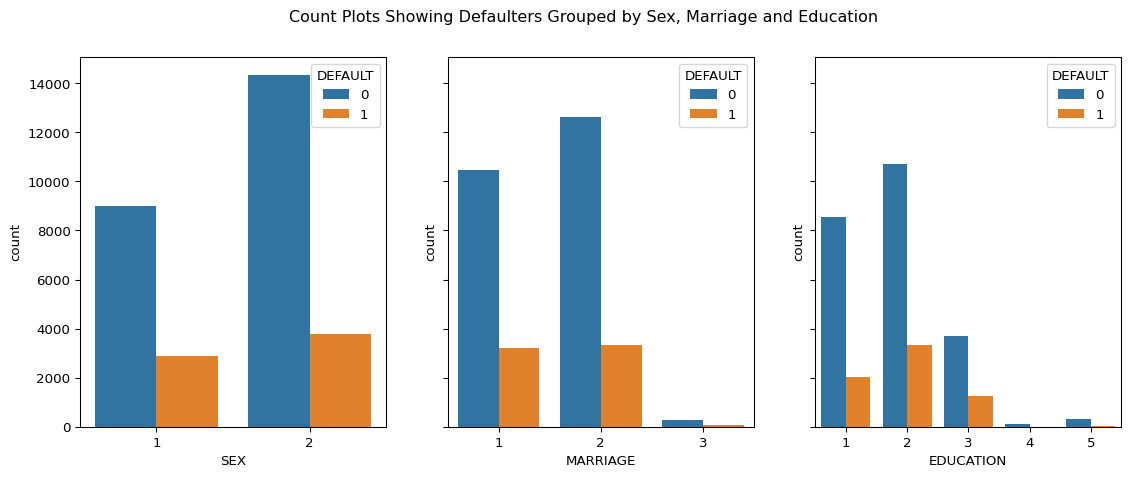

In [ ]:
# Create count plots showing defaulters grouped by 'SEX', 'MARRIAGE' and 'EDUCATION' in just one figure.
fig1, axis1 = plt.subplots(nrows = 1, ncols = 3, figsize = (14, 5), dpi = 96, sharey = True)
sns.countplot(x = 'SEX', data = df, hue = 'DEFAULT', ax = axis1[0])
sns.countplot(x = 'MARRIAGE', data = df, hue = 'DEFAULT', ax = axis1[1])
sns.countplot(x = 'EDUCATION', data = df, hue = 'DEFAULT', ax = axis1[2])
fig1.suptitle('Count Plots Showing Defaulters Grouped by Sex, Marriage and Education')
plt.show()

Similarly, you can create box plots displaying the age and credit limit of defaulters grouped by `'SEX', 'MARRIAGE'` and `'EDUCATION'` in just one figure.

**Note:**

- To get an axis at second row and third column from a grid of, say 3 rows and 5 columns figure, use `axis[1, 2]`.

- Whenever you have more than one input values to the `y` parameter in any kind of plot, make sure that `sharey` parameter is set to `False` inside the `subplots()` function.

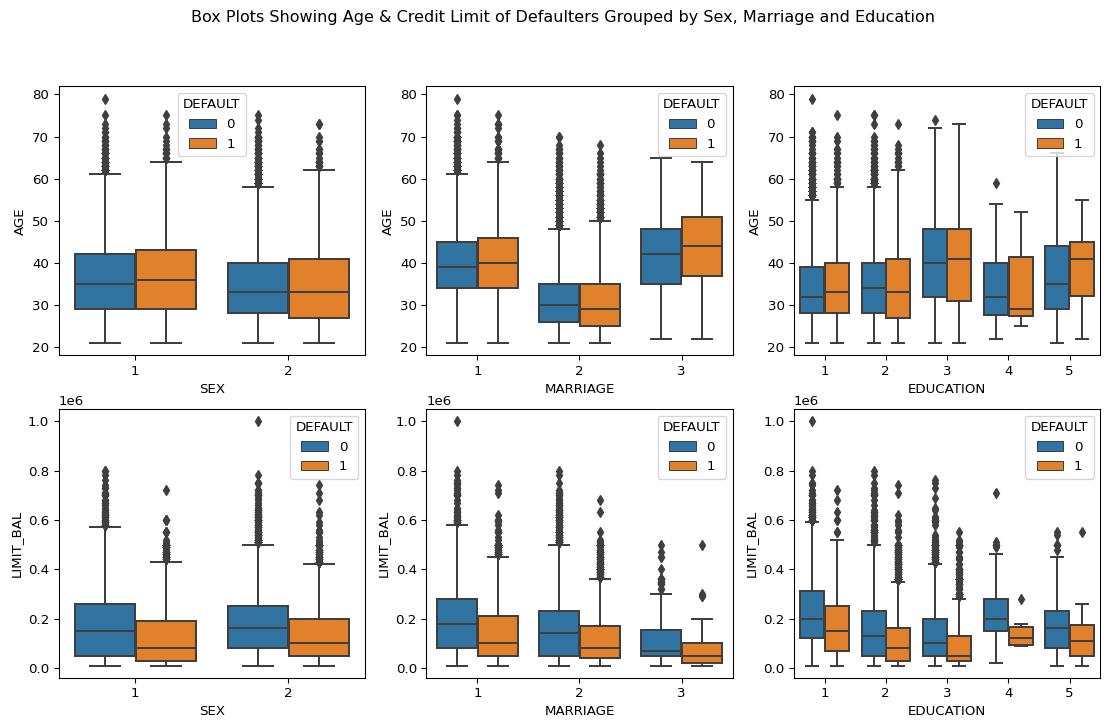

In [ ]:
# Create box plots displaying the age and credit limit of defaulters grouped by 'SEX', 'MARRIAGE' and 'EDUCATION' in just one figure.
fig2, axis2 = plt.subplots(nrows = 2, ncols = 3, figsize = (14, 8), dpi = 96, sharey = False)
sns.boxplot(x = 'SEX', y = 'AGE', hue = 'DEFAULT', data = df, ax = axis2[0, 0])
sns.boxplot(x = 'MARRIAGE', y = 'AGE', hue = 'DEFAULT', data = df, ax = axis2[0, 1])
sns.boxplot(x = 'EDUCATION', y = 'AGE', hue = 'DEFAULT', data = df, ax = axis2[0, 2])
sns.boxplot(x = 'SEX', y = 'LIMIT_BAL', hue = 'DEFAULT', data = df, ax = axis2[1, 0])
sns.boxplot(x = 'MARRIAGE', y = 'LIMIT_BAL', hue = 'DEFAULT', data = df, ax = axis2[1, 1])
sns.boxplot(x = 'EDUCATION', y = 'LIMIT_BAL', hue = 'DEFAULT', data = df, ax = axis2[1, 2])
fig2.suptitle('Box Plots Showing Age & Credit Limit of Defaulters Grouped by Sex, Marriage and Education')
plt.show()

---

#### Activity 1: Correlation Analysis

Let's explore the correlation matrix for the entire dataset to see which features contribute higher towards a customer turning into defaulter.

Also, based on the column information we have obtained so far, there is no need to use the `ID` column while getting the correlation matrix as it is just a unique number given to each customer and has nothing to do with the defaulter status.

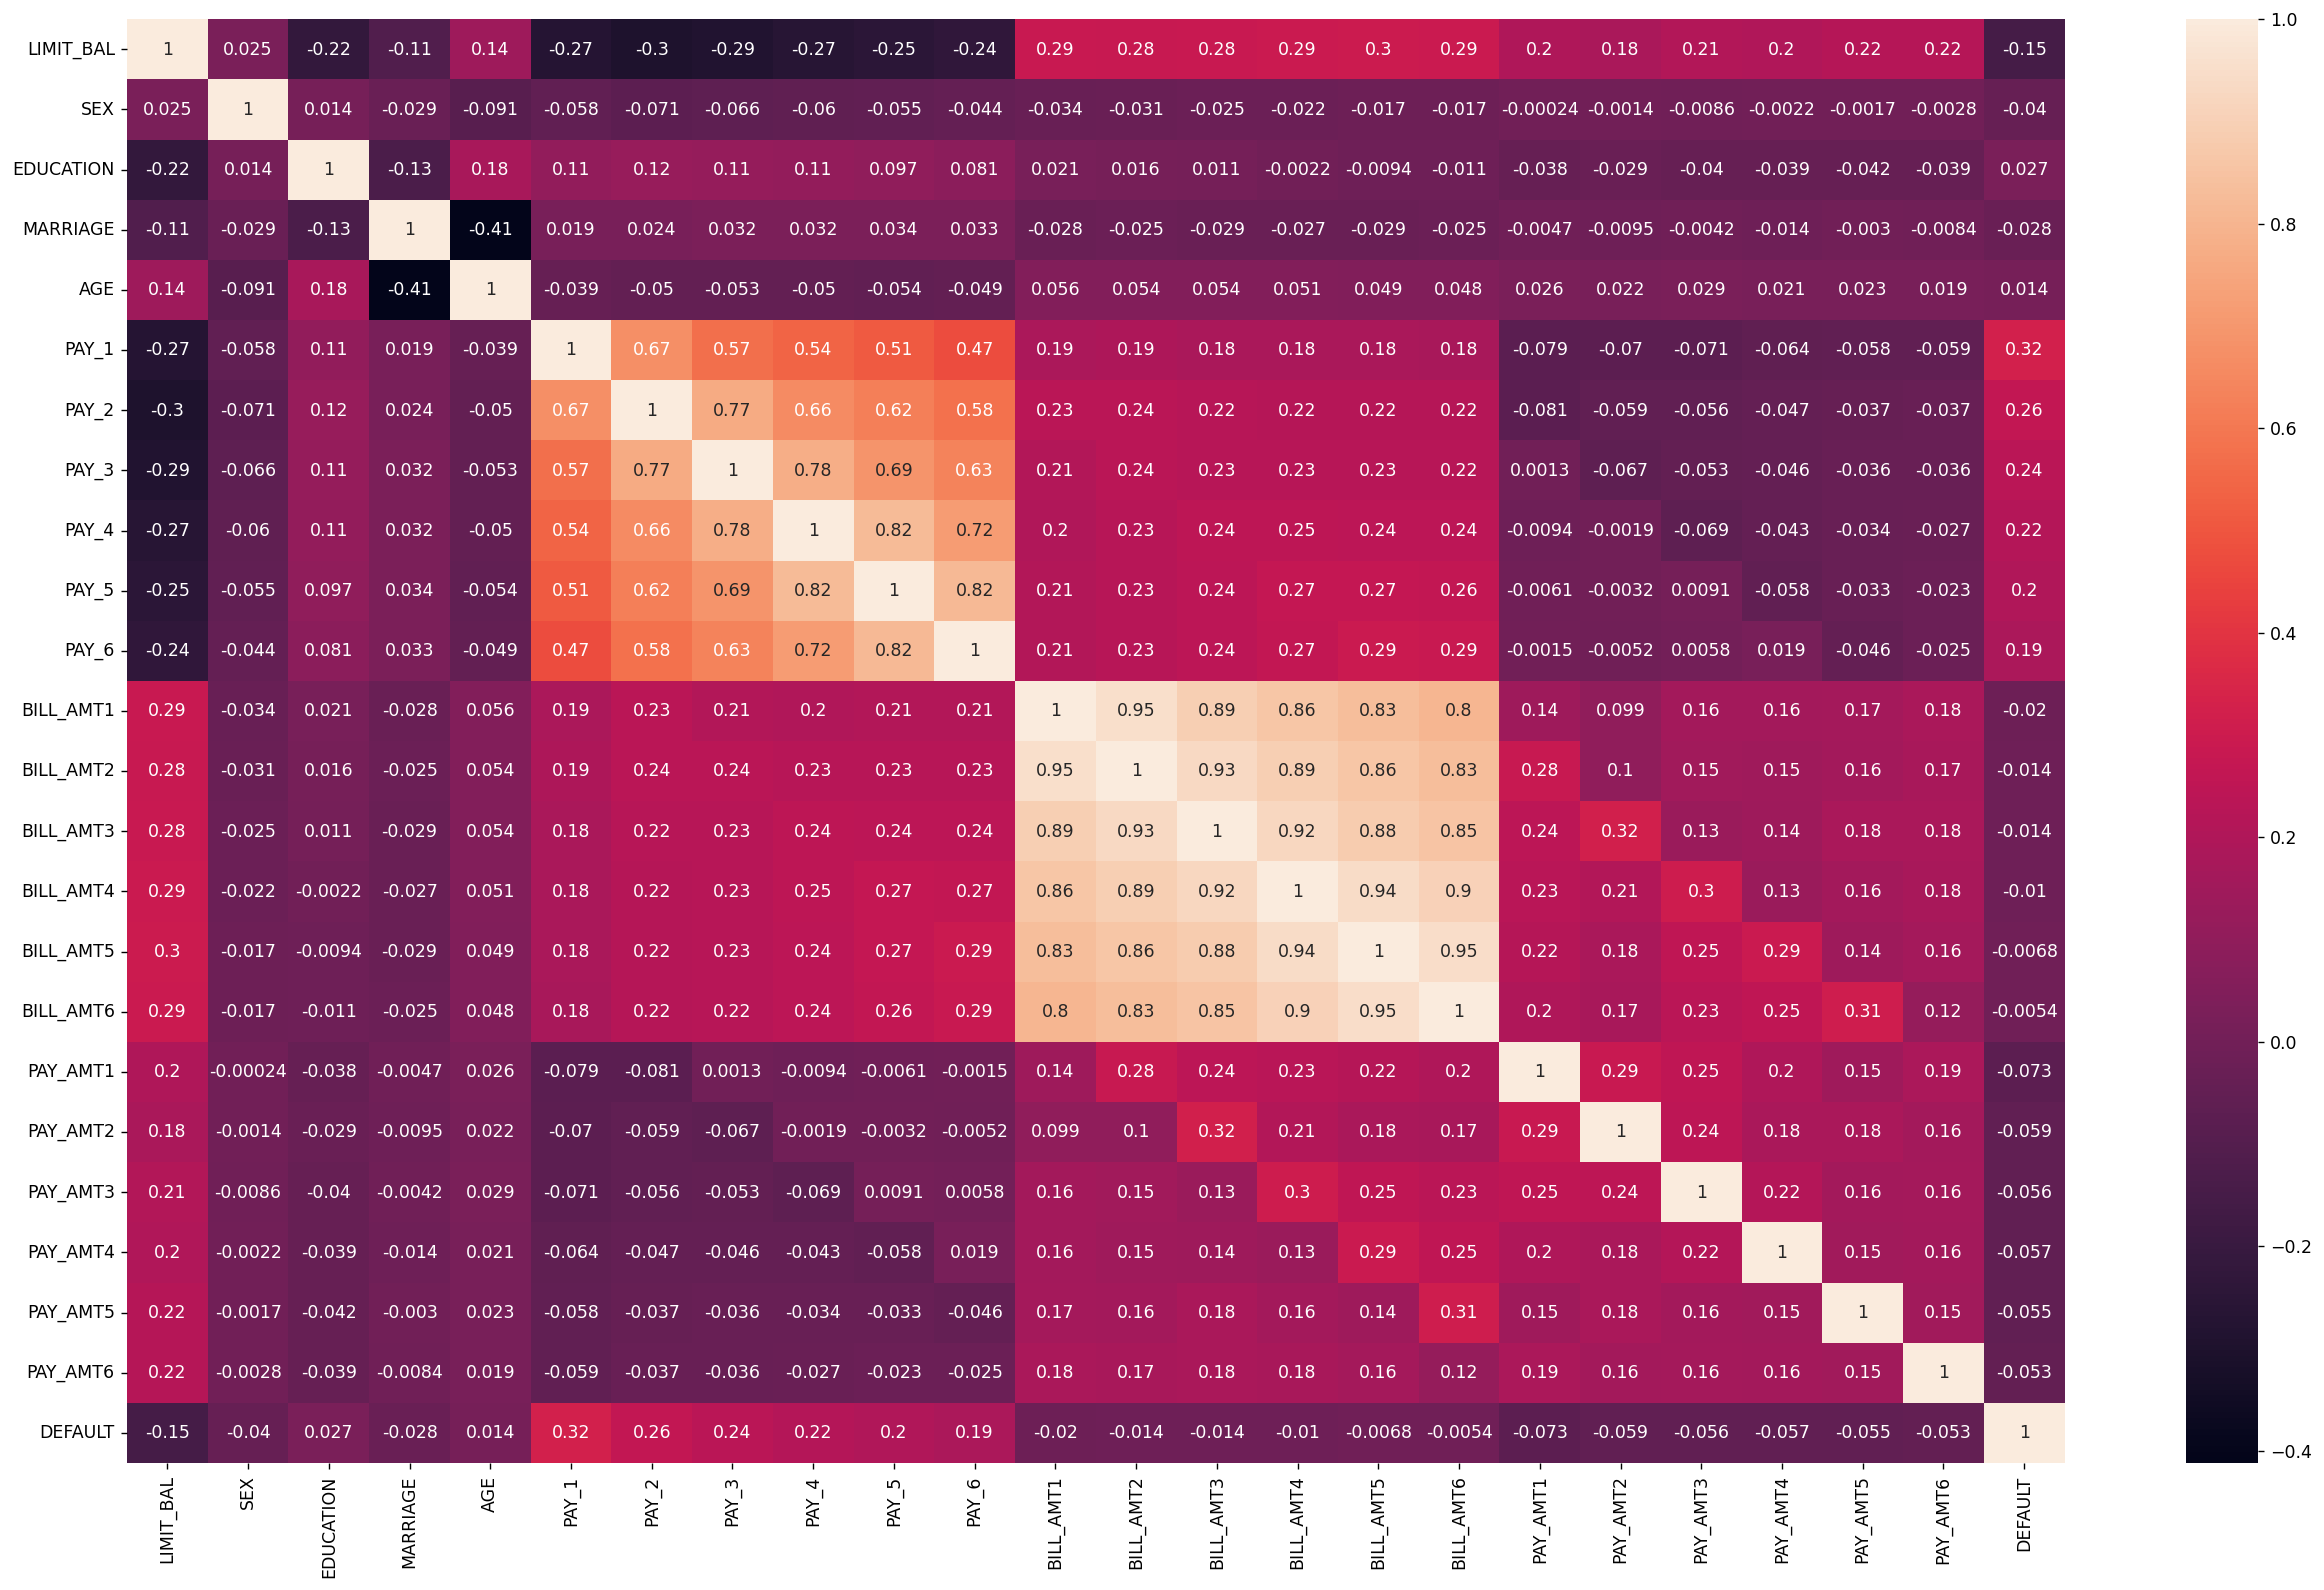

In [ ]:
# S1.1: Create a corrleation heatmap.
corr_df = df.iloc[:, 1:].corr()
plt.figure(figsize = (25, 15), dpi = 125)
sns.heatmap(corr_df, annot = True)
plt.show()

From the correlation heatmap, we can clearly see that the `PAY_1` to `PAY_6` (repayment status) features have the greatest influence on the customer being a defaulter amongst all other features. Moreover, the `BILL_AMT1` to `BILL_AMT6` features have the greatest influence over the repayment status, which in turn are highly dependent on `LIMIT_BAL`.

We can expect the decision tree model to be influenced by these 13 features.

---

#### Activity 2: Decision Tree Classifier Design

So far we have clearly observed and understood that the prediction of credit card defaulter simply put is to identify the customer into two class lables: **Yes** or **No**

Hence, this is a case of 'binary classification' where, we have 2 possible outcomes and have to identify in which category will the customer belong based on their past records. Let us build a **Decision Tree** classifier.

A **decision tree** is a flowchart-like tree structure consisting of multiple nodes as shown below.

<img src = "https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/decision-tree-example.png">

The above below represents a simple decision making process when you feel hungry and decide what to eat.

Suppose you are studying in the evening, until you felt hungry. Then you ask yourself whether you are feeling hungry?

- If the answer is no, then you continue with your work.

- Else you ask yourself another question: "Is it past 7:30 PM?".

  - If the answer is yes, then you take a salad.

  - Else you ask yourself another question: "Have you done your workout today?"
    
    - If the answer is yes, then you order a pizza and reward yourself for your workout.

    - Else you choose to eat something healthy to avoid that stubborn tummy.

Bingo, you have made a very decision tree.

In general, a decision tree consists of three type of nodes:

1. **Root Node:** The very top node is called as `root node` or just a Node. Alternatively, it is also called as `top decision node`. It represents the entire population or sample, and this further gets divided into two or more homogeneous sets.

2. **Decision Node:** When a sub-node splits into further sub-nodes, then it is called a `decision node`. These are also called as `internal nodes`, or at-times just  Node(s). Internal nodes have arrows pointing to them, and they have arrows pointing away from them.

3. **Leaf or Terminal Node:** Nodes with no children (no further split) is called `leaf` or `terminal node` or just leaves. Leaf nodes have arrows pointing to them, but there are no arrows pointing away from them.

A general example of a decision tree:

<img src = "https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/decision-tree-example-2.png">


This flowchart-like structure helps you in decision making. Its visualisation is like a flowchart diagram which mimics the human-level thinking. That is why decision trees are easy to understand and interpret. Each node in a tree acts as a test case for some attribute and each edge descending from that node corresponds to one of the possible answers to the test case.

This process is recursive and is repeated for every subtree rooted at the new nodes.

Now that we have got a brief introduction of a decision tree, let's build one to predict credit card defaulters using the `sklearn` module.

- First import the following modules:

  ```python
  from sklearn.model_selection import train_test_split
  from sklearn.tree import DecisionTreeClassifier    
  from sklearn import tree
  from sklearn import metrics
  from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
  ```

  where
  - `DecisionTreeClassifier` class contains the methods and attributes to build a decision tree.

  - `tree` allows us to plot a decision tree

  - `metrics` allows us to retrieve information about nodes in a tree and its depth.

- Then split the DataFrame into train and test sets.

- Create an object (say `dtree_clf`) of the `DecisionTreeClassifier()` constructor.

- Call the `fit()` function on the above constructor with train features and target variables as inputs.

- Get the predicted target values for both train and test sets by calling the `predict()` function on `dtree_clf`

- Get the accuracy score on both train and test sets by calling the `accuracy_score()` function on the `metrics` object.



In [ ]:
# S2.1: Create the feature and target dataset for training and testing the model.

# Import the required libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
# The 'ConfusionMatrixDisplay' function allows us to plot a confusion matrix heatmap in one go.

feature_columns = list(df.columns)
feature_columns.remove('DEFAULT')
feature_columns.remove('ID')

X = df[feature_columns]
y = df['DEFAULT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 30)

# Modeling a decision tree.
dtree_clf = DecisionTreeClassifier()
dtree_clf.fit(X_train, y_train)
y_train_pred = dtree_clf.predict(X_train)
y_test_pred = dtree_clf.predict(X_test)

print(f"Accuracy on the train set: {metrics.accuracy_score(y_train, y_train_pred):.4f}\n")
print(f"Accuracy on the test set: {metrics.accuracy_score(y_test, y_test_pred):.4f}")

Accuracy on the train set: 0.9995

Accuracy on the test set: 0.7288


Let's also plot a confusion matrix for the train set by using the `ConfusionMatrixDisplay.from_estimator()` function of the `sklearn.metrics` module. Its syntax is:

> `ConfusionMatrixDisplay.from_estimator(estimator, X, y_true, values_format)`

where

- **`estimator`:** is the object of the classifier used. In this case, `dtree_clf`.

- **`X`:** is the features set.

- **`y_true`:** is a set of actual target values.

- **`values_format`:** specifies the format for a set of values to be displayed in a confusion matrix. If set to `None`, the format specification is either `'d'` or `'.2g'` whichever is shorter. However, we will set `'d`' as input parameter to avoid displaying the values in scientific notation.

You can read more about the `ConfusionMatrixDisplay.from_estimator()` function from the link provided below:

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

Let's also print the classification report for the train set.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16300
           1       1.00      1.00      1.00      4700

    accuracy                           1.00     21000
   macro avg       1.00      1.00      1.00     21000
weighted avg       1.00      1.00      1.00     21000



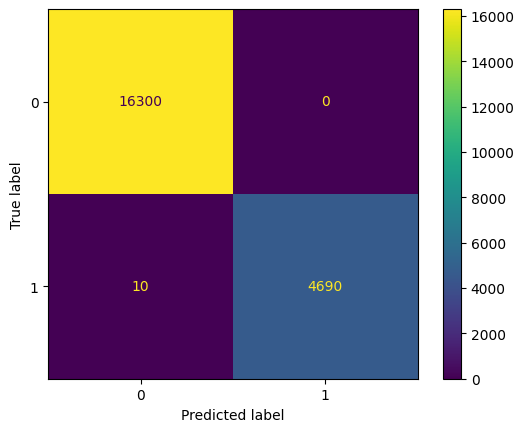

In [ ]:
# S2.2: Plot a confusion matrix and print a classification report for the train set.
ConfusionMatrixDisplay.from_estimator(dtree_clf, X_train, y_train, values_format='d')
print(classification_report(y_train, y_train_pred))

The f1-scores are 1 and the number of misclassified values are 10. This means the decision tree classifier predicts the target values accurately for the train set.

Now let's see how well it performs on the test set because that's what matters the most.

              precision    recall  f1-score   support

           0       0.84      0.81      0.82      7064
           1       0.38      0.43      0.40      1936

    accuracy                           0.73      9000
   macro avg       0.61      0.62      0.61      9000
weighted avg       0.74      0.73      0.73      9000



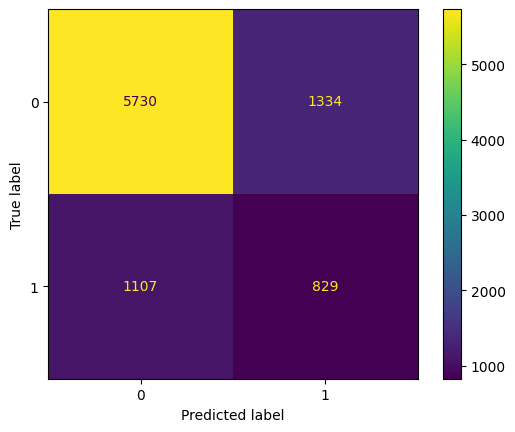

In [ ]:
# S2.3: Plot a confusion matrix and print a classification report for the test set.
ConfusionMatrixDisplay.from_estimator(dtree_clf, X_test, y_test, values_format='d')
print(classification_report(y_test, y_test_pred))

The decision tree classifier is able to identify most of the `0` labels correctly that results into a good f1-score of 0.82. However, it incorrectly classified more than 1000 instances of label `1` as label `0` which is why its f1-score is 0.41 (very poor).

The total number of misclassified values = $1334 + 1107 = 2441$ which is a lot.

The practical implications of this misclassification are that the Taiwanese bank:

- Will issue credit card to 1107 potential defaulters who will fail to pay back to the bank. This will cause a huge loss to the bank.

- And, will NOT issue to the credit cards to 1334 non-defaulters who have the capacity to pay back to the bank. Thus losing out on a profit making opportunity.

Hence, we need to fine tune our decision tree based prediction model to ensure that the Taiwanese Bank don't make any losses and don't miss the opportunity to make profits.

But before that, first, let us visualise the tree and understand how the decision tree algorithm works, after which we will be in a better position to look under the surface of the model and refine the model to achieve better scores.


---

#### Activity 3: Plot Decision Tree

The next step is to create an actual decision tree for the decision tree classifier we have built so far. This is done with the help of the `graphviz` and `sklearn.tree` Python modules.

The `sklearn.tree` makes a decision tree in the DOT format. DOT is a graph description language. DOT graphs are typically files with the filename extension as `.gv` or `.dot`.

Here is an example of a DOT file:

```dot
digraph graphname {
    a -> b -> c;
    b -> d;
}
```

The resulting tree structure of the above DOT file is

<img src = "https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/decision-tree-example-3.png">

**Image credits:** *https://en.wikipedia.org/wiki/DOT_(graph_description_language)*

**Plotting a decision tree:** To plot a decision tree.

- Import the following Python modules:

  ```python
  from sklearn.tree import export_graphviz
  from io import StringIO
  from IPython.display import Image  
  import pydotplus
  ```

- Create an object of the `StringIO` class and store it in a variable say `dot_data`. The `io.StringIO` module implements a file-like class, `StringIO`, that reads and writes a string buffer (also known as memory files). Basically, it will create an empty dot file.

- Use the `export_gaphviz()` function of the `sklearn.tree` module to export a decision tree in the DOT format. This function generates a `GraphViz` representation of the decision tree, which is then written into `out_file`. We will write the contents of the `out_file` to the empty dot file created above. Inside the function, pass the following inputs:

  - **`decision_tree`:** The decision tree to be exported to `GraphViz`. In this case, `dtree_clf`.

  - **`out_file`:** The handle or name of the output file. In this case, `dot_date`. If set to `None`, the result is returned as a string.

  - **`max_depth`:** It can be used to control the depth of the tree for display scaling purposes. If set to `None`, the tree is fully generated.
  
  - **`feature_names`:** It is used to label the corresponding feature names in the decision tree. If set to `None`, generic names will be used.
  
  -  **`class_names`:** Using `class_names` we can choose to display the names of target class at the *leaf nodes* in ascending numerical order. If `True`, shows a symbolic representation of the class name.

  - **`filled`:** The appearance of a decision tree can be customised using this parameter.
  
  - **`rounded`:** It is used to draw node boxes with rounded corners and use Helvetica fonts instead of Times-Roman.

  You can read more about the `export_graphviz()` function from the link provided below:

  https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

- Once exported, generate graphical renderings using the following steps:

  - Call the `getvalue()` function on the `dot_data` variable which is essentially an object of the `StringIO` class. The `getvalue()` function returns the entire contents of the stream

  - Pass the output of the above function as an input to the `graph_from_dot_data()` function of the `pydotplus` object. Store the output in a variable, say `graph`.

- Now we have got our decision tree. Now write it to a PNG file by calling the `write_png()` function. Pass a string followed by `.png` as an input to this function to name your PNG file. In this case, we will name our PNG file as `'Credit_Card_Tree.png'`.


In [ ]:
# S3.1: Create an actual decision tree for the decision tree classifier you have built so far.
# Import the required modules.
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(decision_tree = dtree_clf, out_file = dot_data, filled = True, rounded = True,
                feature_names = feature_columns, class_names = ['0', '1']
                )

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Credit_Card_Tree.png')
Image(graph.create_png())

`Tip`: Click anywhere in the tree image click anywhere to zoom in/out the tree. But still, the complete tree is hard to visualize, especially when you are new to decision trees.

To overcome this issue, let us print only a small part of the `decision tree` for better understandability. This can be done by using the `max_depth` parameter while exporting the decision tree.

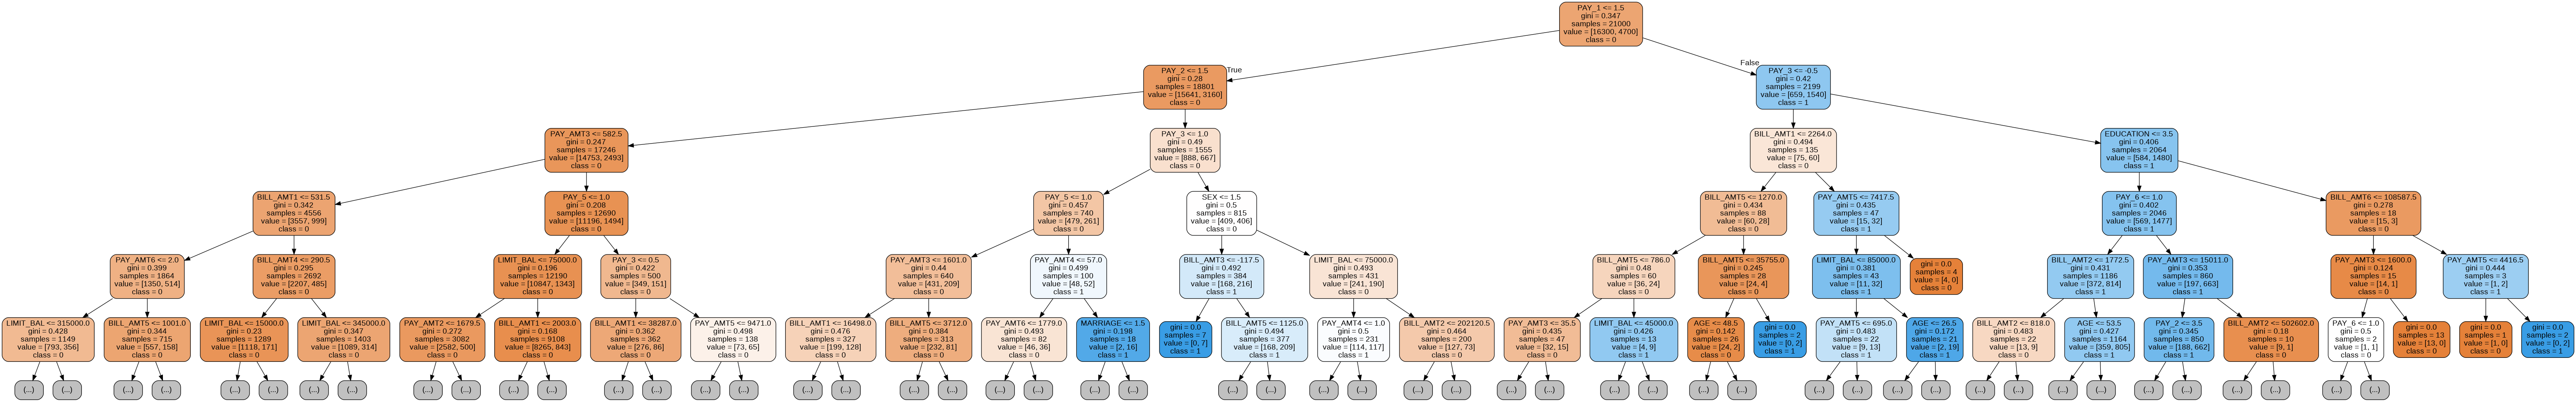

In [ ]:
# S3.2: Resize the above decision tree using the 'max_depth' parameter.
dot_data = StringIO()
export_graphviz(dtree_clf, max_depth = 5, out_file = dot_data, filled = True, rounded = True,
                feature_names = feature_columns, class_names = ['0','1']
                )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Credit_Card_Tree.png')
Image(graph.create_png())

`Tip`: Click anywhere in the tree image to zoom in/out of the tree. The tree structure can be downloaded as a `.png` image.

---

#### Interpret a Decision Tree

The decision tree is read in a similar way we interpret a flowchart.

*   The classifier model has selected `PAY_1` as the root node.

  From the dataset, we have `PAY_1` as the payment status for the current month. The numerical value in the field is read as:
  - `-1` denotes paid on time
  - `1` denotes payment delay for one month
  - `2` denotes payment delay for two months
    
      ...

  - `7` denotes payment delay for seven months
  - `8` denotes payment delay for eight months and above

*   The condition at the root node says `PAY_1 <=1.5` which means that a **customer should not have delayed the payment by one month**.

  To arrive at an outcome `decision tree` verifies the condition specified at the `respective node`. After feature comparison, decision tree moves to the `next node`, which is connected to the current node via directional lines along with the comparison outcome marked over the line.

  As per the obtained `decision tree`:

  - If the comparison leads to `True`, then the customer payment status for `PAY_2` previous month bill cycle is verified, and the decision making process carries further until the tree reached the target class `label`.

  - Else if the comparision leads to `False`, then the customer payment status for `PAY_3` two months prior to the current bill cycle is verified, and similarly the decision making carries further until the tree reached the target class `label`.

A snapshot of first few nodes as per above explanation

<img src = "https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/actual-decision-tree-example-1.png">

As you can see, each node in a decision tree acts as a test case for some attribute and each edge descending from that node corresponds to one of the possible answers to the test case.

This process is recursive and is repeated for every subtree rooted at the new nodes.

Let's stop here. You will learn to create a decision tree without using the `sklearn` module in the next class.

---

#### Activities

<br>

**Teacher Activities:**

1. Detect Credit Card Defaulters - Decision Tree I (Class Copy)

   Link on Panel
   
2. Detect Credit Card Defaulters - Decision Tree I (Reference)
   
   Link on Panel
   

---